## Member
6210422003 Kritsana Jongsathitphaibul​

6210422033 Watcharapong Wongrattanasirikul​

6210422038 Rangsarid Pringwanid​

6210422058 Theptat Santanon 

In [1]:
import numpy as np 
import pandas as pd
import re 
import glob
import numpy as np
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
sns.set_style("darkgrid")
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import math

## Data Loading

In [2]:
# loading data 

df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Data Preparing 

In [3]:
# explore data 
# check null data 
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

# Column Check

In [4]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [5]:
df_selected  =  ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']

## Feature Engineering
 we transform feature from 8 feature to 37 feature such  take log ,  root , power, devide and multipier

In [6]:
# Feature Engineering  
def power_f(data) :
    return data*data

def root_f(data) :
    return data**(0.5)
# df[['Air temperature [K]_2' , 'Process temperature [K]_2' , 'Rotational speed [rpm]_2' ,'Torque [Nm]_2','Tool wear [min]_2']] = df[df_selected].apply(power_f)
# df[['Air temperature [K]_rt' , 'Process temperature [K]_rt' , 'Rotational speed [rpm]_rt' ,'Torque [Nm]_rt','Tool wear [min]_rt']] = df[df_selected].apply(root_f)
# df['Rotation_Torque'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']
# df['Temp_diff'] =  df['Process temperature [K]'] - df['Process temperature [K]']

df["Temp"] = df["Air temperature [K]"]*df["Process temperature [K]"]
df["Poor"] = df["Torque [Nm]"]/df["Rotational speed [rpm]"]
df["Poor2"] = df["Torque [Nm]"]/np.sqrt(df["Rotational speed [rpm]"])
df["In_Temp"] = df["Air temperature [K]"]/df["Process temperature [K]"]
df["In_Poor"] = df["Torque [Nm]"]*df["Rotational speed [rpm]"]
df["In_Poor2"] = df["Torque [Nm]"]*np.sqrt(df["Rotational speed [rpm]"])
df["Air_Sq"] = df["Air temperature [K]"]**2
df["Pro_Sq"] = df["Process temperature [K]"]**2
df["Rot_Sq"] = df["Rotational speed [rpm]"]**2
df["Tor_Sq"] = df["Torque [Nm]"]**(1/2)
df["Too_Sq"] = df["Tool wear [min]"]**(1/2)
df["Air_Sqr"] = df["Air temperature [K]"]**(1/2)
df["Pro_Sqr"] = df["Process temperature [K]"]**(1/2)
df["Rot_Sqr"] = df["Rotational speed [rpm]"]**(1/2)
df["Tor_Sqr"] = df["Torque [Nm]"]**(1/2)
df["Too_Sqr"] = df["Tool wear [min]"]**(1/2)
df["Diff_Tepm"] = np.abs(df["Air temperature [K]"]-df["Process temperature [K]"])
df["Ro_Tor_Mul"] = df["Rotational speed [rpm]"]*df["Torque [Nm]"]
df["Ro_Tor_Div"] = df["Rotational speed [rpm]"]/df["Torque [Nm]"]
df["Ro_Tor_Mul_Sqr"] = np.sqrt(df["Rotational speed [rpm]"])*np.sqrt(df["Torque [Nm]"])
df["Ro_Tor_Mul_Log"] = np.log(df["Rotational speed [rpm]"])*np.log(df["Torque [Nm]"])
df["Ro_Tor_Div_Sqr"] = np.sqrt(df["Rotational speed [rpm]"])/np.sqrt(df["Torque [Nm]"])
df["Ro_Tor_Div_Log"] = np.log(df["Rotational speed [rpm]"])/np.log(df["Torque [Nm]"])
df["Ro_Tem_Mul"] = df["Rotational speed [rpm]"]*df["Diff_Tepm"]
df["Tor_Tem_Div"] = df["Diff_Tepm"]/df["Torque [Nm]"]



In [7]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Temp', 'Poor', 'Poor2', 'In_Temp', 'In_Poor', 'In_Poor2', 'Air_Sq',
       'Pro_Sq', 'Rot_Sq', 'Tor_Sq', 'Too_Sq', 'Air_Sqr', 'Pro_Sqr', 'Rot_Sqr',
       'Tor_Sqr', 'Too_Sqr', 'Diff_Tepm', 'Ro_Tor_Mul', 'Ro_Tor_Div',
       'Ro_Tor_Mul_Sqr', 'Ro_Tor_Mul_Log', 'Ro_Tor_Div_Sqr', 'Ro_Tor_Div_Log',
       'Ro_Tem_Mul', 'Tor_Tem_Div'],
      dtype='object')

In [8]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,...,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log,Ro_Tem_Mul,Tor_Tem_Div
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,...,0.000000,10.5,66382.8,36.238318,257.648598,27.597990,6.019827,1.955698,16285.5,0.245327
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,...,1.732051,10.5,65190.4,30.410367,255.324108,27.804494,5.514560,1.890393,14784.0,0.226782
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,...,2.236068,10.4,74001.2,30.323887,272.031616,28.515994,5.506713,1.874866,15579.2,0.210526
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,...,2.645751,10.4,56603.5,36.278481,237.914901,26.717609,6.023162,1.976858,14903.2,0.263291
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,...,3.000000,10.5,56320.0,35.200000,237.318352,26.744101,5.932959,1.965346,14784.0,0.262500


In [9]:
df.shape

(10000, 39)

## Duplicated data

In [10]:
## copy 

df_c =  df.copy()

In [11]:
df_c.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Temp', 'Poor', 'Poor2', 'In_Temp', 'In_Poor', 'In_Poor2', 'Air_Sq',
       'Pro_Sq', 'Rot_Sq', 'Tor_Sq', 'Too_Sq', 'Air_Sqr', 'Pro_Sqr', 'Rot_Sqr',
       'Tor_Sqr', 'Too_Sqr', 'Diff_Tepm', 'Ro_Tor_Mul', 'Ro_Tor_Div',
       'Ro_Tor_Mul_Sqr', 'Ro_Tor_Mul_Log', 'Ro_Tor_Div_Sqr', 'Ro_Tor_Div_Log',
       'Ro_Tem_Mul', 'Tor_Tem_Div'],
      dtype='object')

In [12]:
# check data label  
#df_label  =  df_c.groupby(by  = 'Machine failure' ).count()

df_label =  df_c['Machine failure'].value_counts()

# Data Exploratory

In [13]:
df_label

0    9661
1     339
Name: Machine failure, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

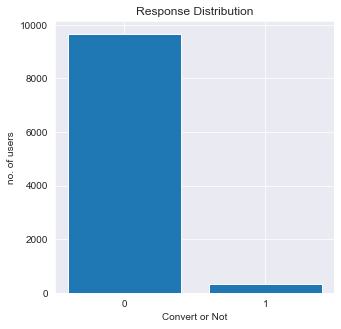

In [115]:
plt.figure(figsize=(5,5))
x=range(2)
plt.bar(x,df_label)
plt.xticks(df_label.index)
plt.title('Response Distribution')
plt.xlabel('Convert or Not')
plt.ylabel('no. of users')
plt.show

In [14]:
# x,y data 
x =  df_c.drop(columns = ['UDI','Product ID','Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Type'], axis =  1   )
y = df_c['Machine failure']

In [15]:
x.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temp',
       'Poor', 'Poor2', 'In_Temp', 'In_Poor', 'In_Poor2', 'Air_Sq', 'Pro_Sq',
       'Rot_Sq', 'Tor_Sq', 'Too_Sq', 'Air_Sqr', 'Pro_Sqr', 'Rot_Sqr',
       'Tor_Sqr', 'Too_Sqr', 'Diff_Tepm', 'Ro_Tor_Mul', 'Ro_Tor_Div',
       'Ro_Tor_Mul_Sqr', 'Ro_Tor_Mul_Log', 'Ro_Tor_Div_Sqr', 'Ro_Tor_Div_Log',
       'Ro_Tem_Mul', 'Tor_Tem_Div'],
      dtype='object')

## Function  preparing

In [16]:
## feature importance


# ## Feature importtance
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# data train test split 
def split_data(x,y,n): # test_size
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=float(n), random_state=123)
    return X_train, X_test, y_train, y_test 

#one hot encoder 
from sklearn.preprocessing import OneHotEncoder
def one_hot(x):
    x = pd.get_dummies(data = x , columns  =  ['Type'] )
    return x 

## feature importance 
def f_importance(X,y) :
    model_impor =  DecisionTreeClassifier()
    rf  =  RandomForestRegressor(n_estimators=100)
    rf.fit(X,y)
    # check type value 
    print(type(rf.feature_importances_))
    feature_score = rf.feature_importances_
    
    df_feature_score =  pd.DataFrame(feature_score, index = list(X.columns), columns= ['Feature_importance']).sort_values(by = 'Feature_importance' , ascending = False)
    
    return df_feature_score
# check number of sample 

def plot_sample(df,columns_label) :
    df_goup =  df.groupby(by=columns_label).count().reset_index()
    df_goup.plot.bar(x=columns_label,y='Machine failure').show()
    
## data standardize 
from sklearn import preprocessing
def standardized(data) :
    #new_data  =  preprocessing.scale(data) # 
    sc = StandardScaler()
    new_data = sc.fit_transform(data)
    return new_data      


## Imbalance Handling function

In [17]:
imbalance_list = ['under_sample','over_sample','SMOTE','SMOTE_TOMEK',None]

def imbalance( x_train , y_train ,m = None ):
    if m == 'under_sample' :
        random_under = RandomUnderSampler(random_state=123)
        random_under.fit(x_train, y_train)
        x_undersampled, y_undersampled = random_under.fit_resample(x_train, y_train)
        return x_undersampled, y_undersampled
    
    elif m == 'over_sample' :
        random_over = RandomOverSampler(random_state=123)
        random_over.fit(x_train, y_train)
        X_oversampled, y_oversampled = random_over.fit_resample(x_train, y_train)
        df_oversampled = pd.concat([pd.DataFrame(data=X_oversampled),pd.DataFrame(data=y_oversampled)], axis=1, sort=False)
        return  X_oversampled, y_oversampled
    elif m == 'SMOTE' :
        sm = SMOTE(random_state=123)
        sm.fit(x_train, y_train)
        X_SMOTE, y_SMOTE = sm.fit_resample(x_train, y_train)
        df_SMOTE = pd.concat([pd.DataFrame(data=X_SMOTE),pd.DataFrame(data=y_SMOTE)], axis=1, sort=False)
        return  X_SMOTE, y_SMOTE
    elif m == 'SMOTE_TOMEK' :
        smt=SMOTETomek(random_state=123)
        smt.fit(x_train, y_train)
        X_SMOTET, y_SMOTET = smt.fit_resample(x_train, y_train)
        df_SMOTET = pd.concat([pd.DataFrame(data=X_SMOTET),pd.DataFrame(data=y_SMOTET)], axis=1, sort=False)
        return X_SMOTET, y_SMOTET
    elif m == None : 
        
        return x_train , y_train
        
        #  rotation speed* toue 

## Result Function

In [18]:
# result data 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculates recall for 1:100 dataset with 90 tp and 10 fn
from sklearn.metrics import recall_score , precision_score
def result_AOC(y_test, y_predict,probs):
    
    # tn, fp, fn, tp  = confusion_matrix(y_test, y_predict).ravel()
    # accuracy   =  (tp+tn)/(tn+tp+fn+fp)
    # percision  =  tp/(tp+fp) 
    # recall   =  tp/(tp+fn)
    predicted_y = []
    expected_y = []
    #predictions = logreg_model_under.predict(X_test)
    predicted_y.extend(y_predict)
    expected_y.extend(y_test)
    report_test = classification_report(expected_y, predicted_y)
    print(report_test)
    probs = probs[:, 1]
    # calculate scores
   # ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, probs)
    # summarize scores
    #print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    #print(f'accuracy {accuracy} , percision {percision},  recall {recall}')
    #return accuracy ,percision , recall,lr_auc




## Model Function Preparing configure

In [19]:
## created model  function
 # Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, BaggingRegressor, GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

model = ['Svm','Logistic','XGBoost','Nb','sgd','Random_f','Knn','Decision_t']
def fn_model(model,x_train,y_train,x_test,y_test) :
    if model == 'Svm' :
        clf = SVC(kernel='linear',probability=True)
        train_d = clf.fit(x_train, y_train)
        #Predict the response for test dataset
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        y_pred = train_d.predict(x_test)
        y_probs = train_d.predict_proba(x_test)
        return y_pred,y_probs
    elif model  ==  'Logistic' :
        logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
        train_d = logreg.fit(x_train, y_train)
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        y_pred = train_d.predict(x_test)
        y_probs = train_d.predict_proba(x_test)
        return y_pred, y_probs
    elif model == 'XGBoost' :
        xgb_model =  xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc" )
        xgb_m = xgb_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test.to_numpy(), y_test)] )
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        y_pred =  xgb_m.predict(x_test)
        y_probs = xgb_m.predict_proba(x_test)
        return y_pred, y_probs         
    elif model ==  'Nb' :
        nb =  GaussianNB()
        nb.fit(x_train, y_train)
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        y_pred=nb.predict(x_test) 
        y_probs =  nb.predict_proba(x_test)
        return y_pred ,  y_probs 
    
    elif model == 'sgd' :
        sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
        sgd.fit(x_train, y_train)
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        y_pred=sgd.predict(x_test)
        y_probs  =  sgd.predict_proba(x_test)
        return y_pred , y_probs
    
    elif model  ==  'Random_f' :
        Rdf =RandomForestClassifier(n_estimators=100)

        #Train the model using the training sets y_pred=clf.predict(X_test)
        Rdf.fit(x_train,y_train)
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        y_pred = Rdf.predict(x_test)        
        
        y_probs  =  Rdf.predict_proba(x_test)
        return y_pred , y_probs
        
    elif model ==  'Knn' :
        Knn =  KNeighborsClassifier(n_neighbors=3)
        Knn.fit(x_train,y_train)
        # prediction
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        y_pred = Knn.predict(x_test)
        y_probs = Knn.predict_proba(x_test)
        return  y_pred,y_probs
    elif model   ==  'Decision_t' :
        Dt = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = trees)
        Dt.fit(x_train,y_train)
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        #prediction 
        y_pred = Dt.predict(x_test)
        y_probs  =  Dt.predict_proba(x_test)
        return y_pred , y_probs
        
     
    elif model  == 'deep' :
        
        ### created model  ###
        model = Sequential()  
        model.add(Dense(256, kernel_initializer='uniform',activation='relu',input_dim= x_train.shape[1]))
        #model.add(Dense(256,activation='relu'))
        model.add(Dense(128, kernel_initializer='uniform',activation='relu'))
        model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))
        ### add complie###
        
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
         
        model_fit = model.fit(x = x_train ,y = y_train,epochs = 200,batch_size=512) #,validation_data=(x_test ,y_test)
        sc = StandardScaler()
        x_test = sc.fit_transform(x_test)
        y_pred = model.predict(x_test)
        #y_probs  =  model.predict_proba(x_test)
        
        return y_pred , y_probs 
    

# Runing Model 

In [20]:
# prepare to find feature importance 
x1  =  x.copy()
#x1 = x1.drop(columns=['Type'])
x_col = list(x1.columns)

In [21]:
x.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temp,Poor,Poor2,In_Temp,In_Poor,...,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log,Ro_Tem_Mul,Tor_Tem_Div
0,298.1,308.6,1551,42.8,0,91993.66,0.027595,1.086771,0.965975,66382.8,...,0.000000,10.5,66382.8,36.238318,257.648598,27.597990,6.019827,1.955698,16285.5,0.245327
1,298.2,308.7,1408,46.3,3,92054.34,0.032884,1.233899,0.965986,65190.4,...,1.732051,10.5,65190.4,30.410367,255.324108,27.804494,5.514560,1.890393,14784.0,0.226782
2,298.1,308.5,1498,49.4,5,91963.85,0.032977,1.276354,0.966288,74001.2,...,2.236068,10.4,74001.2,30.323887,272.031616,28.515994,5.506713,1.874866,15579.2,0.210526
3,298.2,308.6,1433,39.5,7,92024.52,0.027565,1.043456,0.966299,56603.5,...,2.645751,10.4,56603.5,36.278481,237.914901,26.717609,6.023162,1.976858,14903.2,0.263291
4,298.2,308.7,1408,40.0,9,92054.34,0.028409,1.066004,0.965986,56320.0,...,3.000000,10.5,56320.0,35.200000,237.318352,26.744101,5.932959,1.965346,14784.0,0.262500


## Data Standardization

In [24]:
x_std = standardized(x1)
x_std

array([[-0.95238944, -0.94735989,  0.06818514, ..., -0.31755104,
         0.38396764, -0.24887505],
       [-0.90239341, -0.879959  , -0.72947151, ..., -0.62883143,
        -0.2567811 , -0.43493645],
       [-0.95238944, -1.01476077, -0.22744984, ..., -0.70283946,
         0.08256182, -0.59802563],
       ...,
       [-0.50242514, -0.94735989,  0.59251888, ...,  0.42125301,
         0.1733719 ,  0.17348774],
       [-0.50242514, -0.879959  , -0.72947151, ..., -0.73659479,
        -0.73746001, -0.70363443],
       [-0.50242514, -0.879959  , -0.2162938 , ..., -0.20253698,
        -0.35663805, -0.2893432 ]])

In [125]:
x_std_df =  pd.DataFrame(x_std, columns  = x_col )
#x_all = pd.concat( [x_std_df,pd.DataFrame(x['Type'],columns  =  ['Type'])],axis = 1)
x_std_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temp,Poor,Poor2,In_Temp,In_Poor,...,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log,Ro_Tem_Mul,Tor_Tem_Div
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.980109,0.079191,0.169599,-0.538083,0.629443,...,-2.723864,0.498849,0.629443,-0.276573,0.647619,0.493815,-0.281829,-0.317551,0.383968,-0.248875
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.921349,0.677574,0.660881,-0.534714,0.512456,...,-2.240150,0.498849,0.512456,-0.509201,0.537571,0.615954,-0.640230,-0.628831,-0.256781,-0.434936
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-1.008976,0.688185,0.802643,-0.442365,1.376889,...,-2.099392,0.398954,1.376889,-0.512653,1.328550,1.036780,-0.645796,-0.702839,0.082562,-0.598026
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.950226,0.075735,0.024965,-0.439026,-0.330009,...,-1.984978,0.398954,-0.330009,-0.274970,-0.286628,-0.026899,-0.279463,-0.216691,-0.205914,-0.068645
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.921349,0.171294,0.100256,-0.534714,-0.357824,...,-1.886046,0.498849,-0.357824,-0.318019,-0.314871,-0.011229,-0.343447,-0.271563,-0.256781,-0.076582


In [126]:
x_std_df.shape

(10000, 30)

## Feature Importance Runing 

In [127]:
y =  df_c['Machine failure']
feature= f_importance(x_std_df,y)
feature = feature[feature['Feature_importance'] > 0.03]
#selector = SelectFromModel(feature)
feature

<class 'numpy.ndarray'>


,Feature_importance
Ro_Tem_Mul,0.159812
In_Poor,0.111869
Ro_Tor_Mul_Sqr,0.093711
Ro_Tor_Mul,0.077914
Tor_Tem_Div,0.076890
In_Temp,0.048268
Rotational speed [rpm],0.041991
Rot_Sq,0.040103
Too_Sqr,0.038278
Too_Sq,0.036749


## Feature Result After Feature Importance Process

In [129]:
## columns 
list(feature.index)

['Ro_Tem_Mul',
 'In_Poor',
 'Ro_Tor_Mul_Sqr',
 'Ro_Tor_Mul',
 'Tor_Tem_Div',
 'In_Temp',
 'Rotational speed [rpm]',
 'Rot_Sq',
 'Too_Sqr',
 'Too_Sq',
 'Tool wear [min]',
 'Rot_Sqr',
 'In_Poor2']

In [130]:
xx = x[list(feature.index)]
xx.shape

(10000, 13)

In [28]:
# list1 = ["a", "b", "c"]
# list2 = [1, 2]
# all_combinations = []

# # list1_permutations = itertools.permutations(list1, len(list2))

# for u in list1 :
#     for i in  list2 :
#         all_combinations.append((u,i))
# print(all_combinations)        

In [131]:
y.shape

(10000,)

## Data Train Test Split 

In [132]:
#split data 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
x_train_s, x_test_s, y_train_s, y_test_s = split_data(xx,y,0.2)

In [134]:
# standardize 
x_train_s = standardized(x_train_s)

In [135]:
# before
print(x_train_s.shape)
print(y_train_s.shape)

(8000, 13)
(8000,)


In [136]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Temp', 'Poor', 'Poor2', 'In_Temp', 'In_Poor', 'In_Poor2', 'Air_Sq',
       'Pro_Sq', 'Rot_Sq', 'Tor_Sq', 'Too_Sq', 'Air_Sqr', 'Pro_Sqr', 'Rot_Sqr',
       'Tor_Sqr', 'Too_Sqr', 'Diff_Tepm', 'Ro_Tor_Mul', 'Ro_Tor_Div',
       'Ro_Tor_Mul_Sqr', 'Ro_Tor_Mul_Log', 'Ro_Tor_Div_Sqr', 'Ro_Tor_Div_Log',
       'Ro_Tem_Mul', 'Tor_Tem_Div'],
      dtype='object')

## Model Running 

In [137]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
df_result = pd.DataFrame(columns = ['Model_N','Imbalance','accuracy','auc','tp','tn','fn','fp'])
counter = 0 
for i in range(len(model)) :
    for j in range(len(imbalance_list)) :
        df_result.loc[counter,'Model_N'] = model[i] 
        df_result.loc[counter,'Imbalance'] = imbalance_list[j] 
        counter += 1          
for i,j in df_result.iterrows():
    #print(j)
    try:
        print(f"{j['Model_N']}-{j['Imbalance']}")
        x_b,y_b = imbalance( x_train_s , y_train_s ,j['Imbalance'] )  #x,y = imbalance( x_train , y_train , 'over_sample')
        x_train_after  =  x_b
        y_train_after = y_b
        x_test_after = x_test_s
        y_test_after = y_test_s
        predict = fn_model(j['Model_N'],x_train_after,y_train_after,x_test_after,y_test_after) 
        auc = metrics.roc_auc_score(y_test_after, predict[1][:,1])
        tn, fp, fn, tp  = confusion_matrix(y_test_after, predict[0]).ravel()
        accuracy = accuracy_score(y_test_after, predict[0])
        df_result.loc[i,'accuracy'] = accuracy
        df_result.loc[i,'auc'] = auc
        df_result.loc[i, 'tp'] = tp 
        df_result.loc[i, 'tn'] = tn
        df_result.loc[i, 'fn'] = fn
        df_result.loc[i, 'fp'] = fp
        print('---Done---')
    except :
        print('--Fail--')

Svm-under_sample
---Done---
Svm-over_sample
---Done---
Svm-SMOTE
---Done---
Svm-SMOTE_TOMEK
---Done---
Svm-None
---Done---
Logistic-under_sample
---Done---
Logistic-over_sample
---Done---
Logistic-SMOTE
---Done---
Logistic-SMOTE_TOMEK
---Done---
Logistic-None
---Done---
XGBoost-under_sample
[0]	validation_0-auc:0.50624
[1]	validation_0-auc:0.47115
[2]	validation_0-auc:0.47115
[3]	validation_0-auc:0.47115
[4]	validation_0-auc:0.47103
[5]	validation_0-auc:0.47103
---Done---
XGBoost-over_sample
[0]	validation_0-auc:0.50624
[1]	validation_0-auc:0.50624
[2]	validation_0-auc:0.50624
[3]	validation_0-auc:0.50624
[4]	validation_0-auc:0.50624
[5]	validation_0-auc:0.50624
---Done---
XGBoost-SMOTE


C:\Users\ThinkPad\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ThinkPad\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ThinkPad\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: Th

[0]	validation_0-auc:0.50624
[1]	validation_0-auc:0.50260
[2]	validation_0-auc:0.50260
[3]	validation_0-auc:0.50260
[4]	validation_0-auc:0.50260
[5]	validation_0-auc:0.50260
---Done---
XGBoost-SMOTE_TOMEK
[0]	validation_0-auc:0.50624
[1]	validation_0-auc:0.50260
[2]	validation_0-auc:0.50260
[3]	validation_0-auc:0.50260
[4]	validation_0-auc:0.50260
[5]	validation_0-auc:0.50260
---Done---
XGBoost-None
[0]	validation_0-auc:0.50000
[1]	validation_0-auc:0.50000
[2]	validation_0-auc:0.50624
[3]	validation_0-auc:0.50624
[4]	validation_0-auc:0.50624
[5]	validation_0-auc:0.50624
[6]	validation_0-auc:0.50987


C:\Users\ThinkPad\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ThinkPad\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[7]	validation_0-auc:0.50987
[8]	validation_0-auc:0.50987
[9]	validation_0-auc:0.50987
[10]	validation_0-auc:0.50987
[11]	validation_0-auc:0.50987
---Done---
Nb-under_sample
---Done---
Nb-over_sample
---Done---
Nb-SMOTE
---Done---
Nb-SMOTE_TOMEK
---Done---
Nb-None
---Done---
sgd-under_sample
---Done---
sgd-over_sample
---Done---
sgd-SMOTE
---Done---
sgd-SMOTE_TOMEK
---Done---
sgd-None
---Done---
Random_f-under_sample
---Done---
Random_f-over_sample
---Done---
Random_f-SMOTE
---Done---
Random_f-SMOTE_TOMEK
---Done---
Random_f-None
---Done---
Knn-under_sample
---Done---
Knn-over_sample
---Done---
Knn-SMOTE
---Done---
Knn-SMOTE_TOMEK
---Done---
Knn-None
---Done---
Decision_t-under_sample
--Fail--
Decision_t-over_sample
--Fail--
Decision_t-SMOTE
--Fail--
Decision_t-SMOTE_TOMEK
--Fail--
Decision_t-None
--Fail--


## Find Measurement Precision and Recall  

In [138]:
df_result['pecision'] = df_result['tp'] / (df_result['tp'] + df_result['fp']) 
df_result['recall'] = df_result['tp'] / (df_result['tp']+df_result['fn'])
df_result


,Model_N,Imbalance,accuracy,auc,tp,tn,fn,fp,pecision,recall
0,Svm,under_sample,0.895,0.934587,63,1727,13,197,0.242308,0.828947
1,Svm,over_sample,0.874,0.940564,65,1683,11,241,0.212418,0.855263
2,Svm,SMOTE,0.873,0.935195,65,1681,11,243,0.211039,0.855263
3,Svm,SMOTE_TOMEK,0.874,0.935312,65,1683,11,241,0.212418,0.855263
4,Svm,None,0.962,0.932248,0,1924,76,0,NaN,0.0
5,Logistic,under_sample,0.8895,0.936802,61,1718,15,206,0.228464,0.802632
6,Logistic,over_sample,0.8815,0.939948,63,1700,13,224,0.219512,0.828947
7,Logistic,SMOTE,0.884,0.938663,63,1705,13,219,0.223404,0.828947
8,Logistic,SMOTE_TOMEK,0.885,0.938663,63,1707,13,217,0.225,0.828947
9,Logistic,None,0.8825,0.938033,63,1702,13,222,0.221053,0.828947


## Save Model Result 

In [37]:
df_result.to_csv('model_performance_result.csv')

In [ ]:
report_test_dic = classification_report(tup_im[4], predicted_y_test,output_dict=True)

  res_df = pd.DataFrame(report_test_dic)

In [5]:
import pandas 
import numpy 

df2 =  pd.read_csv('./model_performance_result.csv')

In [41]:
print(x_train_s.shape, y_train_s.shape)
print(x_test_s.shape, y_test_s.shape)

(8000, 12) (8000,)
(2000, 12) (2000,)


## Deep Learning 

In [73]:
## start with  deep learning 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adagrad
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
    ### created model  ###
def model_deep(optimizer='adam', len_featrure=list(x_train_s.shape)[1]):   
    model = Sequential()  
    model.add(Dense(128, kernel_initializer='uniform',activation='relu',input_dim= x_train_s.shape[1]))
    #model.add(Dense(256,activation='relu'))
    #model.add(Dense(128, kernel_initializer='uniform',activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer='uniform',activation='relu')) 
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid')) #sigmoid , tanh , 
    ### add complie###
    #sgd = SGD(lr=0.1, momentum=0.9) #tf.keras.optimizers.Adagrad(0.1)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC']) #sgd adam Adagrad
    #model_fit = model.fit(x = x_train_s ,y = y_train_s, epochs = 200, batch_size=256)
    return model 
#model_fit = model.fit(x = X_train ,y = y_train, epochs = 200, batch_size=256) #,validation_data=(x_test ,y_test)
#y_pred = model.predict(X_test)


In [71]:
y_b.shape

(15474,)

## Grid Search Approch to find the best  parameter set 

In [75]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
epochs = [50, 100, 150,200]
batches = [32,64,128,512]

#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]#
####### Grid Search  Parameter set parameter value 
model22 = KerasRegressor(build_fn=model_deep)
#model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
#epochs = 200,batch_size=512
param_grid = dict(optimizer= optimizer, nb_epoch=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model22, param_grid=param_grid,n_jobs=1)
grid_result = grid.fit(x_b, y_b)

C:\Users\ThinkPad\AppData\Local\Temp/ipykernel_18232/3879024614.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model22 = KerasRegressor(build_fn=model_deep)


484/484 [==============================] - 1s 1ms/step - loss: 0.3224 - auc: 0.9376


## Show result with  grid search approch  with best parameter set  

In [76]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.290086 using {'batch_size': 32, 'nb_epoch': 50, 'optimizer': 'Nadam'}


## Running Model  with grid search  parameter and applies with  imbalance pre-paring process

In [155]:
## created table best  parameter  
df_result_dl = pd.DataFrame(columns =  ['Model_N','Imbalance','accuracy','auc','tp','tn','fn','fp'])
model_dl = ['deep_learning'] 
imbalance_list = ['under_sample','over_sample','SMOTE','SMOTE_TOMEK',None]
for i in range(len(model_dl)) :
    for j in range(len(imbalance_list)) :
        df_result_dl.loc[counter,'Model_N'] = model_dl[i] 
        df_result_dl.loc[counter,'Imbalance'] = imbalance_list[j] 
        counter += 1    
        
for i , j  in df_result_dl.iterrows():
    #print(j)
        print(f"{j['Model_N']}-{j['Imbalance']}")
        x_b,y_b = imbalance( x_train_s , y_train_s ,j['Imbalance'] )  #x,y = imbalance( x_train , y_train , 'over_sample')
        x_train_after  = x_b
        y_train_after = y_b
        x_test_after = x_test_s
        y_test_after = y_test_s       
        
        #predict = fn_model(j['Model_N'],x_train_after,y_train_after,x_test_after,y_test_after) 
        
        ### model architecture 
        model = Sequential()  
        model.add(Dense(256, kernel_initializer='uniform',activation='relu',input_dim= x_train_s.shape[1]))
        model.add(Dense(128,activation='relu'))
        model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
        #model.add(Dropout(0.2))
        model.add(Dense(32, kernel_initializer='uniform',activation='relu')) 
        model.add(Dropout(0.2))
        model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid')) 
        
        model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['AUC']) 
        model_fit = model.fit(x = x_train_s ,y = y_train_s, epochs = 50, batch_size=32)
        sc = StandardScaler()
        X_test = sc.fit_transform(x_test_after)
        y_pred = model.predict(X_test)
        
        
        
        
        auc = metrics.roc_auc_score(y_test_after, y_pred)
        y_expect = y_pred > 0.5
        tn, fp, fn, tp  = confusion_matrix(y_test_after, y_expect).ravel()
        accuracy = accuracy_score(y_test_after, y_expect)
        df_result_dl.loc[i,'accuracy'] = accuracy
        df_result_dl.loc[i,'auc'] = auc
        df_result_dl.loc[i, 'tp'] = tp 
        df_result_dl.loc[i, 'tn'] = tn
        df_result_dl.loc[i, 'fn'] = fn
        df_result_dl.loc[i, 'fp'] = fp
        print('---Done---')

        

deep_learning-under_sample
Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2098 - auc: 0.6345
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0982 - auc: 0.8965
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0853 - auc: 0.9223
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0784 - auc: 0.9464
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0720 - auc: 0.9545
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0699 - auc: 0.9528
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0659 - auc: 0.9565
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0643 - auc: 0.9594
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0628 - auc: 0.9617
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0592 - auc: 0.9670
Epoch 11/50
250/250 [=

In [160]:
df_result_dl
df_result_dl['pecision'] = df_result_dl['tp'] / (df_result_dl['tp'] + df_result_dl['fp']) 
df_result_dl['recall'] = df_result_dl['tp'] / (df_result_dl['tp']+df_result_dl['fn'])
df_result_dl['F1'] = ((df_result_dl['recall']*df_result_dl['pecision'] )/ (df_result_dl['recall']+df_result_dl['pecision']))*2
df_result_dl.to_csv('deep_leaning.csv')

## Show Model Architecture

In [161]:
model.summary()

Model: "sequential_2268"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6842 (Dense)          (None, 256)               3584      
                                                                 
 dense_6843 (Dense)          (None, 128)               32896     
                                                                 
 dense_6844 (Dense)          (None, 64)                8256      
                                                                 
 dense_6845 (Dense)          (None, 32)                2080      
                                                                 
 dropout_3383 (Dropout)      (None, 32)                0         
                                                                 
 dense_6846 (Dense)          (None, 1)                 33        
                                                                 
Total params: 46,849
Trainable params: 46,849
Non-t

In [165]:
import tensorflow as tf

tf.keras.utils.plot_model(model, './image_model.png') 

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Model Result

In [166]:
# df['LanguageWantToWorkWith'][1:20]
df_result_dl.head()

,Model_N,Imbalance,accuracy,auc,tp,tn,fn,fp,pecision,recall,F1
85,deep_learning,under_sample,0.9805,0.963788,39,1922,37,2,0.95122,0.513158,0.666667
86,deep_learning,over_sample,0.9805,0.973356,46,1915,30,9,0.836364,0.605263,0.70229
87,deep_learning,SMOTE,0.974,0.96372,24,1924,52,0,1.0,0.315789,0.48
88,deep_learning,SMOTE_TOMEK,0.9765,0.966018,33,1920,43,4,0.891892,0.434211,0.584071
89,deep_learning,None,0.978,0.965498,38,1918,38,6,0.863636,0.5,0.633333


In [30]:
df_result_dl.rename(columns = {'pecision':'precision'}, inplace=True)
df_result_dl= df_result_dl.sort_values('auc',ascending= False)
def display_metrics(df_result_dl):
    return df_result_dl.style.bar(subset=['auc'], color='lightskyblue')\
                    .bar(subset=["precision"], color='lightgreen')\
                    .bar(subset=["recall"], color='orange')\
                    .bar(subset=["F1"], color='red')\
                    .format({'auc':'{:.2%}','precision':'{:.3}','recall':'{:.3}'})
df_filter_got_result =df_result_dl[["Model_N","Imbalance","auc",'precision','recall','F1']]
display_metrics(df_filter_got_result)

,Model_N,Imbalance,auc,precision,recall,F1
1,deep_learning,over_sample,97.34%,0.836,0.605,0.702290
3,deep_learning,SMOTE_TOMEK,96.60%,0.892,0.434,0.584071
4,deep_learning,nan,96.55%,0.864,0.5,0.633333
0,deep_learning,under_sample,96.38%,0.951,0.513,0.666667
2,deep_learning,SMOTE,96.37%,1.0,0.316,0.480000


# Conclussion  

### Deep learning approch with  over-sampling inbalance handling method has auc score at 97.34% and F1 is 0.7 that provide greater performance than other  